Text(0, 0.5, 'Second Feature')

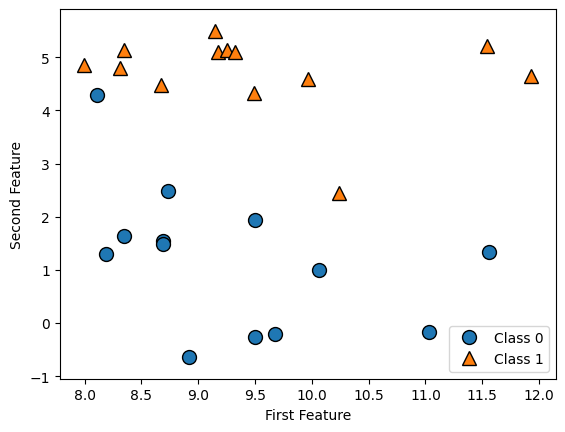

In [19]:
import mglearn
import numpy
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X,y=mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0],X[:, 1],y)
plt.legend(["Class 0","Class 1"],loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)

print("Test set score: {:.2f}".format(clf.score(X_test,y_test)))

Test set score: 0.86


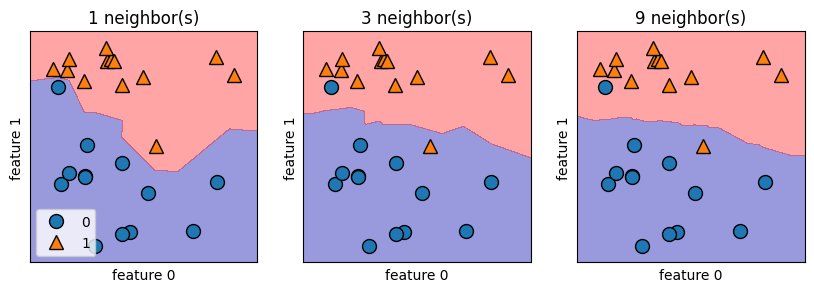

In [15]:
fig,axes=plt.subplots(1,3,figsize=(10,3))

for n_neighbors,axe in zip([1,3,9],axes):
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=axe,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=axe)
    axe.set_title("{} neighbor(s)".format(n_neighbors))
    axe.set_xlabel("feature 0")
    axe.set_ylabel("feature 1")
axes[0].legend(loc=3)

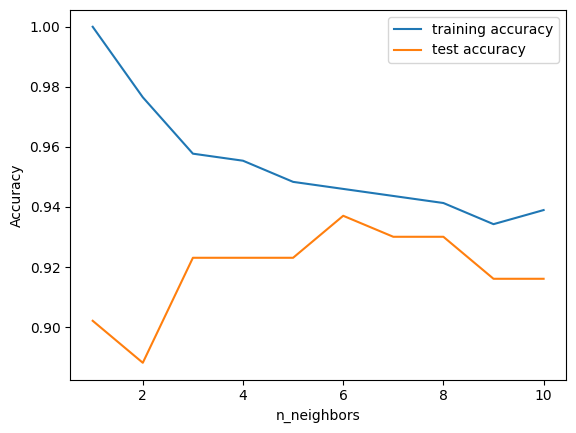

In [18]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)
training_accuracy=[]
test_accuracy=[]
neighbors_numbers=range(1,11)

for n in neighbors_numbers:
    clf=KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_numbers,training_accuracy,label="training accuracy")
plt.plot(neighbors_numbers,test_accuracy,label="test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()

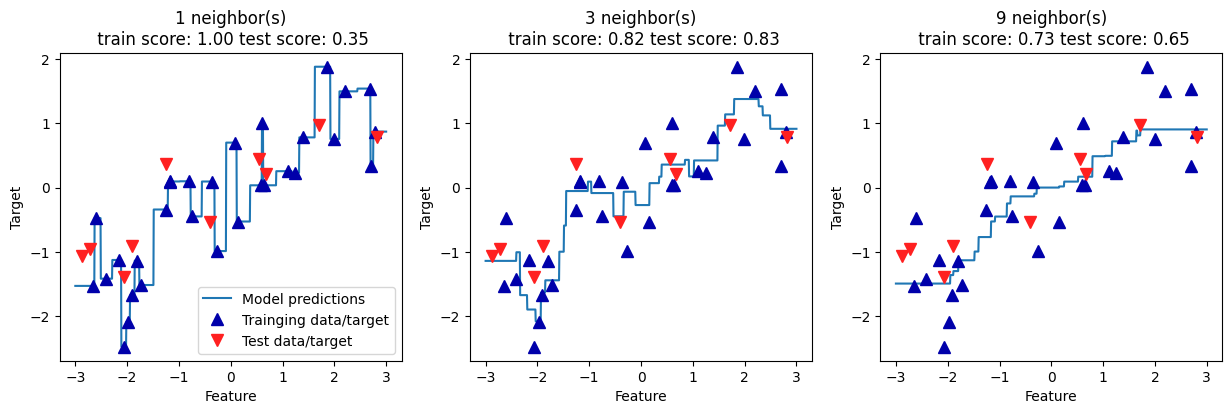

In [23]:
from sklearn.neighbors import KNeighborsRegressor

X,y=mglearn.datasets.make_wave(n_samples=40)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

fig,axes=plt.subplots(1,3,figsize=(15,4))
line=numpy.linspace(-3,3,1000).reshape(-1,1)
for n,axe in zip([1,3,9],axes):
    reg=KNeighborsRegressor(n_neighbors=n)
    reg.fit(X_train,y_train)
    axe.plot(line,reg.predict(line))
    axe.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    axe.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)

    axe.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n,reg.score(X_train,y_train),reg.score(X_test,y_test)))
    axe.set_xlabel("Feature")
    axe.set_ylabel("Target")
    axes[0].legend(["Model predictions","Trainging data/target","Test data/target"],loc="best")